In [2]:
!pip install stac.py

     |████████████████████████████████| 64 kB 436 kB/s eta 0:00:011
  Created wheel for stac.py: filename=stac.py-0.9.0.post4-py3-none-any.whl size=45576 sha256=03eb9878ab9b2b37fa3e01483e59ee9545138d043e2de912d1ea1440f746530b
  Stored in directory: /root/.cache/pip/wheels/dc/5e/02/b29abc269873a16cc665f295f9c75c42d61e0df9a4527b2c9a
Successfully built stac.py
You should consider upgrading via the '/opt/conda/bin/python3.7 -m pip install --upgrade pip' command.


In [3]:
import numpy
import rasterio
import stac
import xarray

from matplotlib import pyplot as plt
from rasterio.windows import Window

In [4]:
st = stac.STAC('http://brazildatacube.dpi.inpe.br/stac/')

In [5]:
my_search = st.search({'collections':['CB4_64_16D_STK-1'], 
                       'bbox':'-54.0,-24.0,-53.0,-23.0',
                       'datetime':'2018-08-01/2019-07-31', 
                       'limit':30})
my_search

name,common_name,min,max,nodata,scale,data_type
BAND13,blue,0.0,10000.0,-9999.0,0.0001,int16
BAND14,green,0.0,10000.0,-9999.0,0.0001,int16
BAND15,red,0.0,10000.0,-9999.0,0.0001,int16
BAND16,nir,0.0,10000.0,-9999.0,0.0001,int16
CLEAROB,ClearOb,0.0,255.0,0.0,0.0001,uint8
CMASK,quality,0.0,4.0,255.0,0.0001,uint8
EVI,evi,0.0,10000.0,-9999.0,0.0001,int16
NDVI,ndvi,0.0,10000.0,-9999.0,0.0001,int16
PROVENANCE,Provenance,1.0,366.0,-1.0,0.0001,int16
TOTALOB,TotalOb,0.0,255.0,0.0,0.0001,uint8


In [6]:
nir_url = my_search['features'][0]['assets']['BAND16']['href']
nir_url

'http://brazildatacube.dpi.inpe.br/Repository/Mosaic/CB4_64_16D_STK/v001/021027/2019-07-28_2019-08-12/CB4_64_16D_STK_v001_021027_2019-07-28_2019-08-12_BAND16.tif'

In [7]:
red_url = my_search['features'][0]['assets']['BAND15']['href']
red_url

'http://brazildatacube.dpi.inpe.br/Repository/Mosaic/CB4_64_16D_STK/v001/021027/2019-07-28_2019-08-12/CB4_64_16D_STK_v001_021027_2019-07-28_2019-08-12_BAND15.tif'

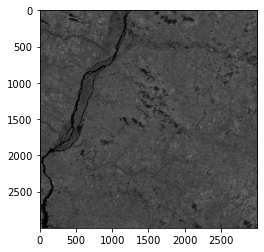

In [8]:
with rasterio.open(nir_url) as dataset:
    nir = dataset.read(1, window=Window(0, 0, 3000, 3000))
    
    plt.imshow(nir, cmap='gray')
    plt.show()

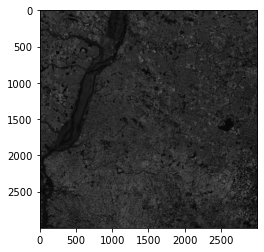

In [9]:
with rasterio.open(red_url) as dataset:
    red = dataset.read(1, window=Window(0, 0, 3000, 3000))
    
    plt.imshow(red, cmap='gray')
    plt.show()

In [10]:
ndvi = (nir - red)/(nir + red)
ndvi

array([[0.64243281, 0.65598651, 0.66296502, ..., 0.41059931, 0.41537706,
        0.42114385],
       [0.63304843, 0.63932552, 0.65859031, ..., 0.53904874, 0.58369471,
        0.64352941],
       [0.62253695, 0.61416361, 0.56180082, ..., 0.68445023, 0.70952531,
        0.70824261],
       ...,
       [0.54086266, 0.58256496, 0.65815217, ..., 0.39270902, 0.3874098 ,
        0.3655814 ],
       [0.59034823, 0.58679086, 0.6131494 , ..., 0.44818719, 0.45159351,
        0.42044257],
       [0.6458693 , 0.5885947 , 0.55903457, ..., 0.46545455, 0.42865986,
        0.41536458]])

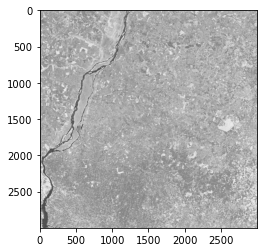

In [14]:
plt.imshow(ndvi, cmap='gray')

calcular o ndvi por conta própria:

In [16]:
ndvi_band_info = my_search['features'][0]['properties']['eo:bands'][7]
ndvi_band_info

{'name': 'NDVI',
 'common_name': 'ndvi',
 'description': None,
 'min': 0.0,
 'max': 10000.0,
 'nodata': -9999.0,
 'scale': 0.0001,
 'center_wavelength': None,
 'full_width_half_max': None,
 'data_type': 'int16'}

pegando a banda ndvi já dispnível pelo bdc

In [17]:
ndvi_url = my_search['features'][0]['assets']['NDVI']['href']
ndvi_url

'http://brazildatacube.dpi.inpe.br/Repository/Mosaic/CB4_64_16D_STK/v001/021027/2019-07-28_2019-08-12/CB4_64_16D_STK_v001_021027_2019-07-28_2019-08-12_NDVI.tif'

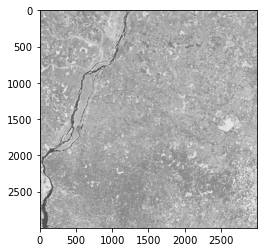

In [18]:
with rasterio.open(ndvi_url) as dataset:
    ndvi_bdc = dataset.read(1, window=Window(0, 0, 3000, 3000))
    
    plt.imshow(ndvi_bdc, cmap='gray')
    plt.show()

Deu diferença da valores! Pq o BDC calcula índices que nós não calculamos!

In [ ]:
ndvi_bdc